<a href="https://colab.research.google.com/github/Bruno-Messias/data_science_visagio/blob/main/2_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Análise Exploratória de Dados </center>


<a id="intro"></a>
## 1. Introdução
Na aula anterior fizemos uma introdução a algumas das principais bibliotecas para se trabalhar com Ciência de Dados no Python. Nesta aula, o principal objetivo será apresentar ferramentas e métodos para a realização de uma Análise Exploratória de Dados.

O principal objetivo da etapa Análise Exploratória de Dados (ou EDA) é coletar informações relevantes e esclarecedoras para que você possa extrair valor dos dados.

A EDA é um procedimento iterativo no qual você investiga os seus dados com algumas perguntas que podem levar a informações valiosas. No entanto, ao indagar seus dados, você acaba entendendo melhor o que está acontecendo e, eventualmente, pode fazer algo valioso com essas novas informações.

Vamos agora procurar alguns *insights* dos conjuntos de dados com que trabalharemos nesta aula.

### Base de dados: Iris

Este é provavelmente um dos conjuntos de dados *training wheels* mais conhecidos. É um conjunto de dados simples e pequeno, comumente usado pela comunidade de ciência de dados como exemplo para a aplicação de algumas técnicas.

Aqui podemos ver quatro características (comprimento e largura da sépala, comprimento da pétala e largura da pétala) para determinar se uma flor é *setosa*, *versicolor* ou *virginica*.

<center><img src="https://cdn-images-1.medium.com/freeze/max/1000/1*gwmXliaxIBkY4NQBhoe9JQ.png?q=20" width="600">


### Base de dados: Real Estate

Este conjunto de dados será utilizado nesta aula como um exercício em que você poderá aplicar o conhecimento das etapas anteriores. Ao contrário do conjunto de dados `` iris``, aqui você encontrará valores ausentes, outliers e outras inconsistências.

Ao longo deste caderno, você será solicitado a realizar algumas análises para extrair informações valiosas desse conjunto de dados "mais realista", que contém informações sobre propriedades vendidas por uma agência imobiliária.

<center><img src="https://miro.medium.com/max/700/1*-Ly3zdgfNiyrz8RShv9rEA.jpeg" width="300">

<a id="sum"></a>
## 2. Resumindo Dados


Quando se deseja medir algo, geralmente é necessário fazer várias medições. Isso ocorre porque geralmente as variáveis usadas para descrever comportamentos têm caráter variável. 

Assim, são necessários vários resultados para se ter uma ideia da situação. Recolhidas essas medidas, é necessário [resumi-las](https://pt.wikipedia.org/wiki/S%C3%ADntese_estat%C3%ADstica) de alguma forma, pois conjuntos contendo dados brutos não são facilmente interpretáveis. 

Portanto, antes de plotar e analisar qualquer coisa, é crucial entender o conjunto de dados com o qual você está trabalhando.

Para fazer isso, algumas informações importantes que devemos procurar são:
1. Dimensão dos dados
2. Tipo dos dados de cada variável (datatype)
3. Estatísticas do conjunto de dados (média, mediana, moda)
4. Valores nulos

Portanto, antes de obter qualquer *insight*, você precisa primeiro examinar seu conjunto de dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Carregar a base 
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Explorando os dados
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [4]:
# Dimensões do dataframe
iris.shape

(150, 5)

In [5]:
# Estatísticas da base (média, mediana, moda, desvio padrão)
iris.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
# verificando se existe algum valor nulo na base
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Exercicio 1

Carregue a base ```real_estate``` e dê uma olhada nos dados usando as funções acima.

In [7]:
# 0. Carregar a base (repare qual o caractere usado como separador do arquivo)

# Usando outro caminho para obter os csv do google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ln -s /content/drive/MyDrive/Data\ Science/Entrega2 /mydrive
!ls /mydrive

'2.1. EDA.ipynb'   dados


In [156]:
real = pd.read_csv(
    '/mydrive/dados/real_estate.csv', 
    sep=';', decimal=',')

real.head()

DateSold  SaleValue  CommissionValue  ...  Suites  Parking    Type
0  11/09/2015 14:10   590000.0         29500.00  ...     1.0        6  Resale
1  26/06/2015 13:34   470000.0         10420.00  ...     0.0      NaN  Resale
2  31/03/2015 16:54   435000.0         24947.25  ...     NaN      NaN     New
3  31/03/2015 15:58   485000.0         20976.25  ...     1.0        1     New
4  14/08/2015 10:29   380000.0          7815.00  ...     NaN        1  Resale

[5 rows x 14 columns]

In [13]:
# 1. Dimensões do dataframe
real.shape

(1852, 14)

In [14]:
# 2. Datatype de cada variável
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DateSold         1852 non-null   object 
 1   SaleValue        1852 non-null   object 
 2   CommissionValue  1848 non-null   object 
 3   Area             1199 non-null   object 
 4   PropertyValue    1116 non-null   float64
 5   MunicipalTax     1027 non-null   object 
 6   RegisterDate     1852 non-null   object 
 7   Dorms            1167 non-null   float64
 8   Photos           1277 non-null   float64
 9   Baths            1170 non-null   object 
 10  Sun              874 non-null    object 
 11  Suites           712 non-null    float64
 12  Parking          1007 non-null   object 
 13  Type             1852 non-null   object 
dtypes: float64(4), object(10)
memory usage: 202.7+ KB


In [15]:
# 3. Estatísticas da base (média, mediana, moda, desvio padrão)
real.describe()

PropertyValue        Dorms       Photos      Suites
count   1.116000e+03  1167.000000  1277.000000  712.000000
mean    6.557138e+05     2.265638    16.835552    0.793539
std     6.455706e+05     0.845558    10.775184    0.688105
min     0.000000e+00     0.000000     0.000000    0.000000
25%     2.887500e+05     2.000000    15.000000    0.000000
50%     4.500000e+05     2.000000    19.000000    1.000000
75%     7.900000e+05     3.000000    22.000000    1.000000
max     6.900000e+06     6.000000    73.000000    4.000000

In [16]:
# 4. Valores nulos
real.isnull().sum()

DateSold              0
SaleValue             0
CommissionValue       4
Area                653
PropertyValue       736
MunicipalTax        825
RegisterDate          0
Dorms               685
Photos              575
Baths               682
Sun                 978
Suites             1140
Parking             845
Type                  0
dtype: int64

<a id="dat"></a>
## 3. Visualização de Dados

Agora que temos uma ideia do que são nossos dados, podemos começar a explorá-los. Para isso, a maneira mais fácil e elegante é a visualização a partir de *plots*.

Para isso, mostraremos alguns gráficos, juntamente com seu uso e código, em análises univariadas e multivariadas.

### 3.1 Análise Univariada
Os gráficos univariados são usados para entender como cada variável se comporta independentemente das outras. Alguns exemplos são *boxplots*, histogramas e gráficos de barras.

#### 3.1.1 Boxplot
Boxplots são usados para ver a distribuição de uma variável, sendo adequado para variáveis numéricas, mostrando informações como a mediana, quartis e até outliers! Basta usar ```plot``` com o argumento ```kind = 'box'```. Também adicionamos os argumentos ```figsize```, ```subplots``` e ```layout``` para ajustá-los como quisermos. Vamos brincar com esses parâmetros para ver como eles funcionam!

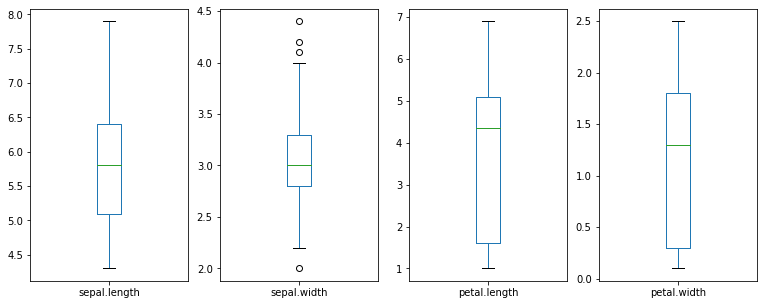

<Figure size 432x288 with 0 Axes>

In [25]:
iris.plot(kind='box', figsize=(30, 5), subplots=True, layout=(1, 9))
_ = plt.figure()
plt.show()

#### 3.1.2. Histogramas
Histogramas são uma ferramenta de visualização da distribuição de variáveis numéricas. São criados diferentes subintervalos de valores para a variável, cada uma com uma quantidade específica de dados. Assim conseguimos ter uma boa noção da distribuição de seus valores. 

Plotaremos abaixo o histograma de forma a analisar todas as variáveis de uma vez:

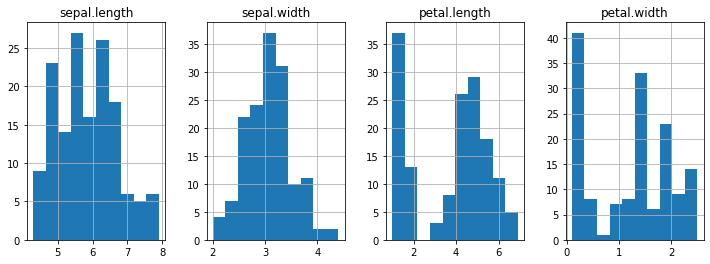

<Figure size 432x288 with 0 Axes>

In [19]:
iris.hist(figsize=(25,4), layout=(1,8))
plt.figure()
plt.show()

#### 3.1.3. Estimativa de Densidade Kernel (KDE)
A Estimativa de densidade kernel, KDE, tenta estimar a função densidade de probabilidade de uma variável. Isso é feito ao desenhar uma curva contínua (o kernel, geralmente uma gaussiana) para cada ponto de dados. Todas as curvas são somadas para formar uma única estimativa de densidade suave.


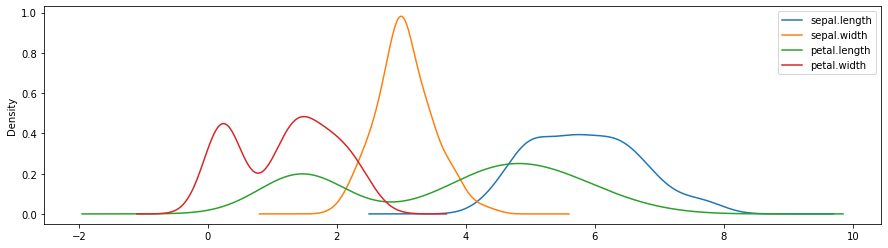

<Figure size 432x288 with 0 Axes>

In [20]:
iris.plot(kind='kde', figsize=(15, 4), subplots=False, layout=(1, 8))
plt.figure()
plt.show()

#### 3.1.4. Gráficos de Barras
Os gráficos de barras são muito uteis quando queremos comparar valores ou verificar a distribuição de valores em categorias (pense no histograma, por exemplo). Vamos dar uma olhada na distribuição de nossa variável ```species``` usando gráficos de barras.

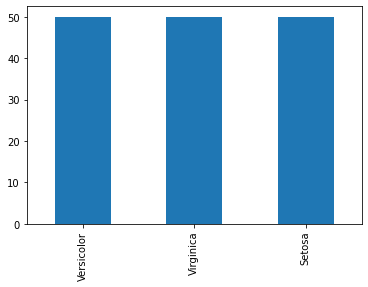

In [21]:
iris['variety'].value_counts().plot(kind="bar")
plt.show()

Três barras idênticas! Isso ocorre porque nossos dados estão igualmente distribuídos entre essas três espécies, cinquenta registros para cada.

### 3.2. Análise Multivariada
Uma vez feitos os gráficos das análises univariadas, devemos ter um bom entendimento de como cada variável age por si mesma. Mas, ao fazer ciência de dados, geralmente queremos entender como uma variável se relaciona com outra. Por exemplo, a temperatura influencia a quantidade de sorvete consumido na praia? Se isso acontecer, como isso influencia o trabalho de quem vende sorvete na praia? O consumo de sorvete cresce assim como a temperatura? Ele cresce na proporção de 1:1?

Todos esses tipos de perguntas são respondidas com análise multivariável, o que pode ser feito com gráficos multivariáveis. Vamos dar uma olhada em alguns deles.

#### 3.2.1. Gráfico de dispersão
O gráfico de dispersão mostra cada registro como um ponto no gráfico, tendo um eixo para cada variável. Por exemplo, poderíamos perguntar como o comprimento da sépala se relaciona com a largura da sépala.

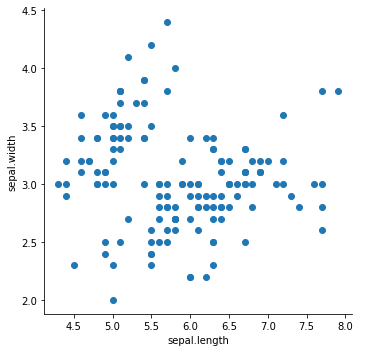

In [26]:
# em algumas versões do python size pode ter virado height
sns.FacetGrid(iris, height=5) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend()
plt.show()

Aparentemente, não há correlação óbvia entre altura e largura da sépala. Mas e se pudéssemos adicionar outra informação, como as espécies? Como cada ponto no gráfico é um registro e cada registro é relacionado a uma espécie, podemos colori-los correspondentemente, adicionando outra informação ao nosso gráfico.

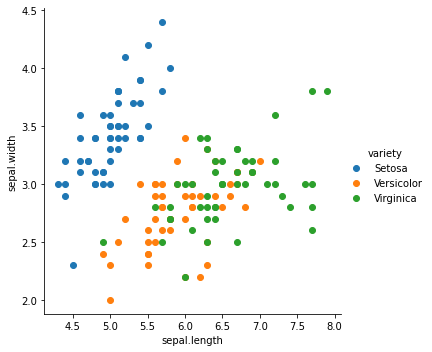

In [27]:
sns.FacetGrid(iris, hue="variety", height=5) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend()
plt.show()

Vê a diferença? Agora podemos ver claramente que Setosas são diferentes das outras em termos de correlação entre altura e largura da sépala. Isso torna possível discernir quase completamente essas espécies das outras com uma reta.

No entanto, separar Versicolor de Viginica é muito mais difícil, pois elas têm uma sobreposição considerável.

#### 3.2.2. Boxplot
Espere, não acabamos de ver o boxplot como boxplot como um gráfico univariável? Você está totalmente certo! Um boxplot é, de fato, um gráfico que mostra apenas um tipo de informação. Mas podemos ver as relações entre uma variável numérica e uma categórica usando diversos boxplots, um para cada categoria, plotando os dados numéricos. Podemos tentar visualizar o comprimento da pétala para cada espécie com isso.

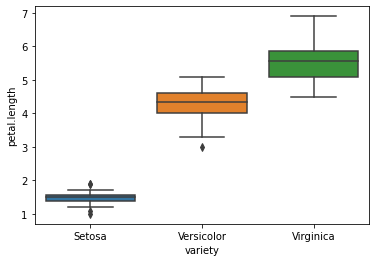

In [31]:
sns.boxplot(x="variety", y="petal.length", data=iris)
plt.show()

Isso deixa mais claro que as espécies diferem em termos de comprimento das pétalas, o que é mais verdade para as Setosas do que para Versicolor e a Virginica.

#### 3.2.3. Estimativa de Densidade Kernel (KDE)
Mais uma vez, um tipo de gráfico que apresentamos anteriormente para análise univariada. Assim como fizemos com os boxplots, podemos combinar o KDE com as espécies para ver como elas se contrastam. Essa é a vantagem sobre os histogramas sobre os quais falamos anteriormente. Imagine ter que comparar barras sobrepostas de diferentes histogramas. Isso não seria fácil. Em vez disso, usamos o KDE, que é próximo a um histograma, mas pode ser sobreposto, pois é apenas uma linha.

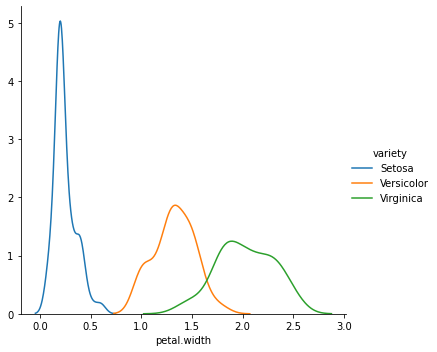

In [32]:
sns.FacetGrid(iris, hue="variety", height=5).map(sns.kdeplot, "petal.width").add_legend()
plt.show()

#### 3.2.4. Plot matrix

A biblioteca ```pandas``` facilita a análise multivariável de todas as variáveis, duas a duas. É o que chamamos de *plot matrix*. Por exemplo, poderíamos usar pandas para produzir um gráfico de dispersão para cada par de variáveis, como mostrado abaixo.



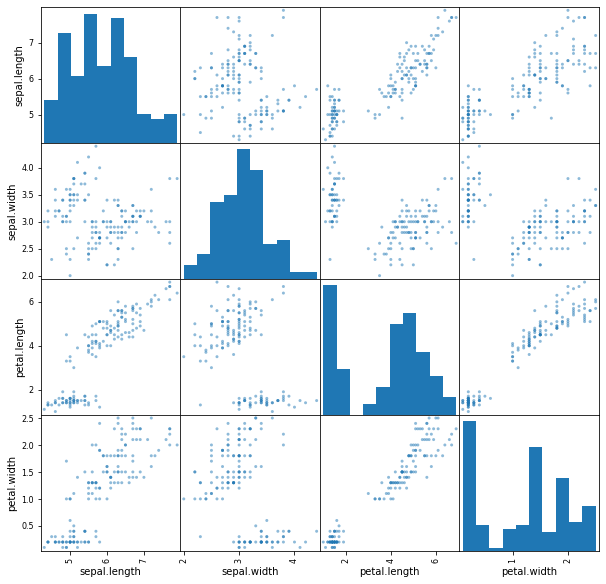

<Figure size 432x288 with 0 Axes>

In [33]:
pd.plotting.scatter_matrix(iris, figsize=(10,10))
plt.figure()
plt.show()

Esse é um belo gráfico! Podemos analisar todos os pares de variáveis de uma só vez. Por exemplo, podemos ver que ```petal.length``` e ```petal.width``` parecem altamente correlacionados, enquanto ```sepal.length``` e ```sepal.length``` e ```sepal.width``` não.

Mas podemos melhorar isso ainda mais com a biblioteca *seaborn*! Ela permite atribuir cores às espécies. Veja o exemplo abaixo.

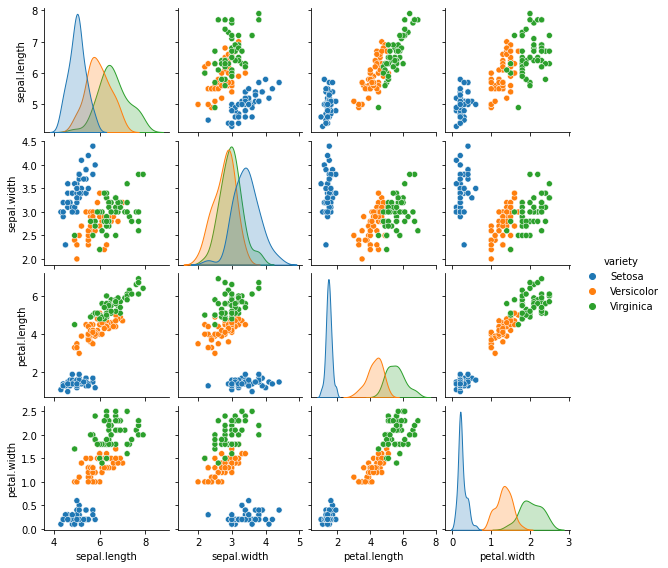

In [34]:
_ = sns.pairplot(iris, hue="variety", height=2, diag_kind="kde")
plt.show()

Podemos ver que Setosa se comporta de maneira diferente para todos os pares de variáveis, o que significa que seria possível isolá-los das outras espécies usando qualquer par de variáveis. Isso não pode ser dito para Versicolor e Virginica, especialmente para o par de variáveis altura e largura da sépala.

#### 3.2.5. Mapa de Calor de Correlação
Os mapas de calor de correlação também são conhecidos como matriz de correlação. Eles representam a correlação para cada par de variáveis, facilitando a visualização de todas as relações existentes entre as variáveis.

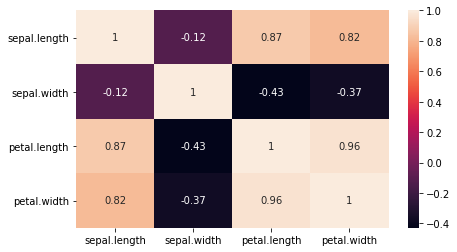

In [35]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True)
plt.show()

Já tínhamos uma boa visão geral dessas correlações dos gráficos anteriores, mas agora podemos confirmar que a altura e a largura da sépala quase não estão correlacionadas, enquanto a altura e a largura da pétala estão quase perfeitamente correlacionadas.

Insights
* ```petal.length``` e ```petal.width``` são as variáveis mais importantes para identificar vários tipos de flores.

* Embora a Setosa possa ser facilmente identificada (linearmente separável), Virginica e Versicolor mostram alguma sobreposição (maior dificuldade de separação com uma linha).

### Exercicio 2


#### Parte 1


*Nota: Nos exercícios a seguir (e na vida real), pode ser necessário verificar a documentação dos pacotes apresentados acima ou fontes externas, como [StackOverflow](https://stackoverflow.com/).*

Com o conjunto de dados ```real_estate```, plote alguns gráficos para obter algumas informações dos dados.

Quais são as principais conclusões a que podemos chegar nesta análise inicial?

Sinta-se livre para adicionar novas células, se necessário.

In [157]:
real.head()

DateSold  SaleValue  CommissionValue  ...  Suites  Parking    Type
0  11/09/2015 14:10   590000.0         29500.00  ...     1.0        6  Resale
1  26/06/2015 13:34   470000.0         10420.00  ...     0.0      NaN  Resale
2  31/03/2015 16:54   435000.0         24947.25  ...     NaN      NaN     New
3  31/03/2015 15:58   485000.0         20976.25  ...     1.0        1     New
4  14/08/2015 10:29   380000.0          7815.00  ...     NaN        1  Resale

[5 rows x 14 columns]

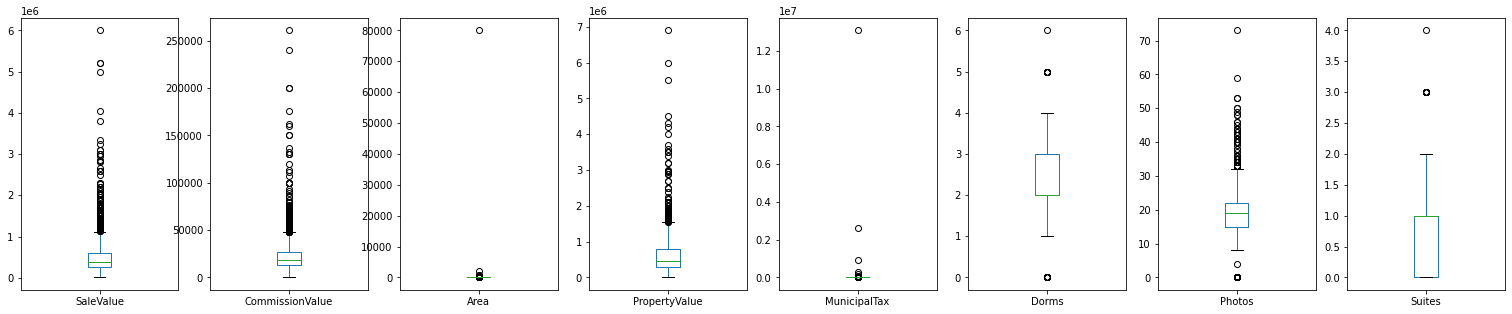

<Figure size 432x288 with 0 Axes>

In [158]:
#Boxplot
real.plot(kind='box', figsize=(30, 5), subplots=True, layout=(1, 9))
_ = plt.figure()
plt.show()

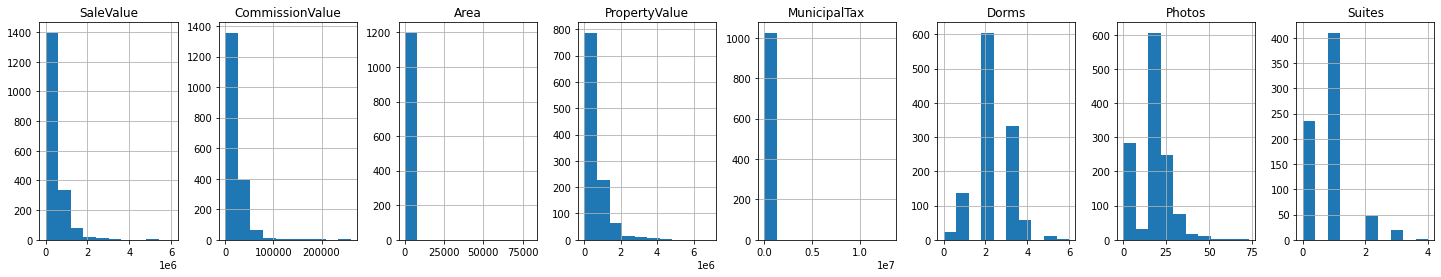

<Figure size 432x288 with 0 Axes>

In [159]:
real.hist(figsize=(25,4), layout=(1,8))
plt.figure()
plt.show()

In [160]:
#Removendo elementos nulos
real_nonnull = real.dropna(axis=0, thresh=None, subset=None, inplace=False)

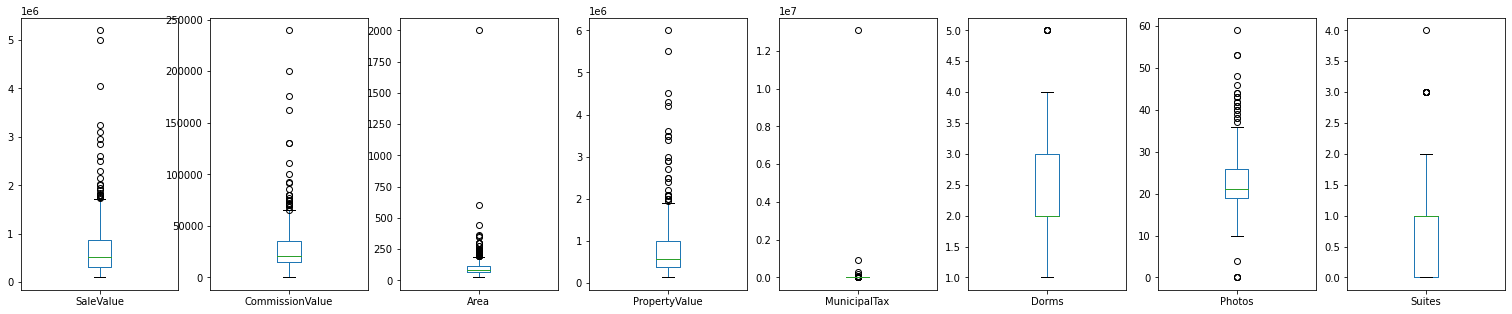

<Figure size 432x288 with 0 Axes>

In [161]:
real_nonnull.plot(kind='box', figsize=(30, 5), subplots=True, layout=(1, 9))
_ = plt.figure()
plt.show()

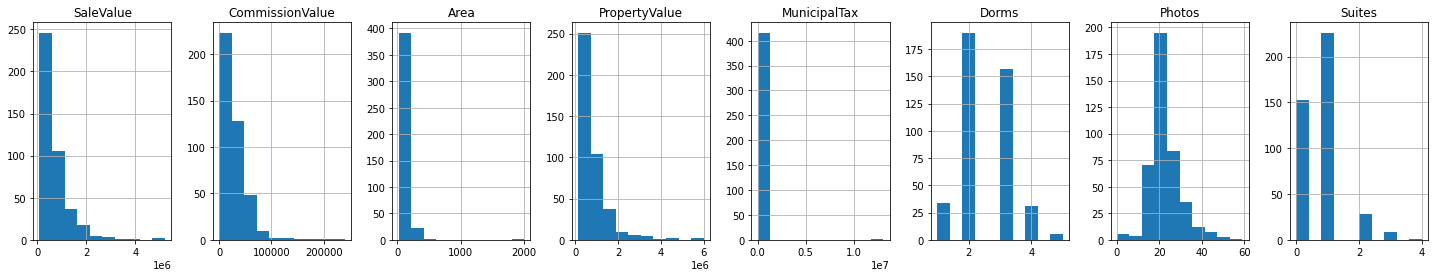

<Figure size 432x288 with 0 Axes>

In [162]:
real_nonnull.hist(figsize=(25,4), layout=(1,8))
plt.figure()
plt.show()

#### Conclusões Iniciais

É possível ver que ao retirar os elementos nulos as distribuições que foram plotadas antes, quase não sofreram perdas de dados, e portanto os dois dataframes que vão ser utilizados para as próximas análises são válidos(*real* e *real_nonnull*)

Depois de trabalhar um pouco com os dados, tente responder às perguntas abaixo. Lembre-se que são perguntas abertas, portanto, é fundamental explicar sua resposta e justificá-la com análises

#### Parte 2
Qual é a faixa de preço em que esta agência imobiliária é especializada?

*dica: use histogramas e ajuste os eixos para melhor visualização*

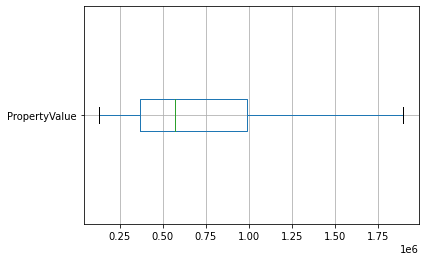

In [163]:
real_nonnull.boxplot(column = "PropertyValue", showfliers=False, vert=False, )

In [190]:
# Vemos que que a faixa de preço varia de cerca de 0.12e6 até cerca de 1.9e6, com as maiores quantidades vendidas entre 0.37e6 à 1e6

#### Parte 3

A área da empresa responsável pelo faturamento dos clientes está trabalhando horas extras no final do mês, isso é justificado?

*dica: use o pacote* ```datetime``` *para lidar com datas*

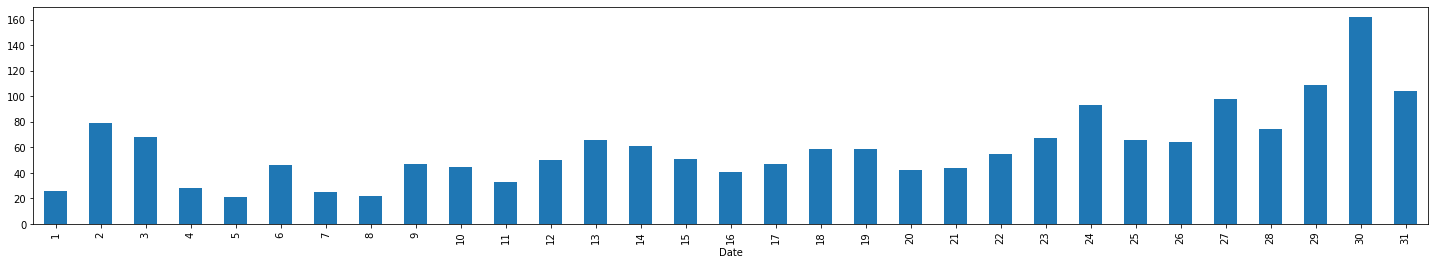

In [164]:
real['Date'] = pd.to_datetime(real['DateSold'])
date = real["Date"].astype("datetime64")
date.groupby(date.dt.day).count().plot(kind="bar", figsize=(25,4))

In [ ]:
#Analizando as ocorrências organizadas por dias em um mês, é possível afirmar que estão trabalhando mais no final do mes

#### Parte 4
A Real Estate Association pede 5% de comissão em cada negócio. Essa porcentagem está sendo respeitada em todos os tipos de propriedade?

*dica: você pode criar uma nova coluna calculada para ajudar a realizar a análise*

In [198]:
import warnings
warnings.filterwarnings('ignore')

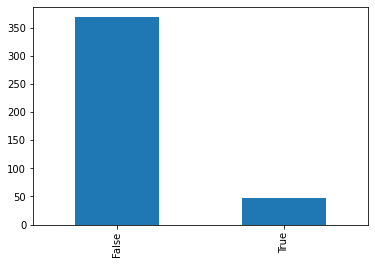

In [199]:
real_nonnull["is_ok"] = (real_nonnull["SaleValue"].astype(float)*0.05 == real_nonnull["CommissionValue"].astype(float))
real_nonnull["is_ok"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
# É possível inferir que esta regra não esta sendo muito bem seguida

#### Parte 5
Quanto tempo se leva, em média, para vender uma propriedade?

*dica: calcule a média, mediana e plote a distribuição*

Média =  302.8393285371703 dias
Mediana =  131.0 dias


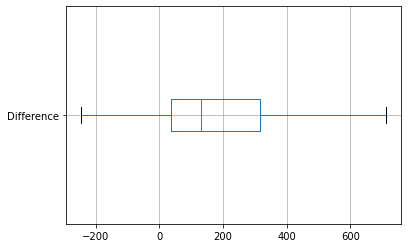

In [193]:
real_nonnull["DateSold"] = pd.to_datetime(real["DateSold"])
real_nonnull["RegisterDate"] = pd.to_datetime(real["RegisterDate"])
real_nonnull['DifferenceOfTime'] = (real_nonnull['DateSold'] - real_nonnull['RegisterDate']).dt.days

print("Média = ",real_nonnull['Difference'].mean(), "dias")
print("Mediana = ", real_nonnull['Difference'].median(), "dias")

real_nonnull.boxplot(column = "Difference", showfliers=False, vert=False, )

#### Parte 6
Podemos verificar reduções de preço se a propriedade demorar muito para ser vendida?

*dica: você pode verificar qualquer correlação entre a diferença do preço inicial e do preço vendido e o tempo desde o registro*

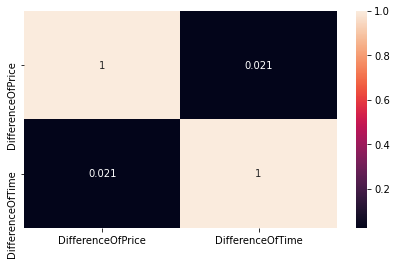

In [195]:
real_nonnull['DifferenceOfPrice'] = (real_nonnull['PropertyValue'] - real_nonnull['SaleValue'])
corr_real = real_nonnull[["DifferenceOfPrice", "DifferenceOfTime"]]

plt.figure(figsize=(7,4)) 
sns.heatmap(corr_real.corr(), annot=True)
plt.show()

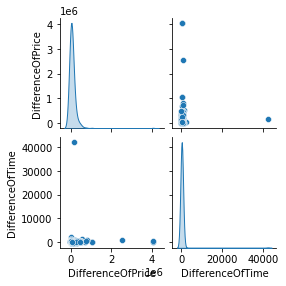

In [197]:
_ = sns.pairplot(corr_real, height=2, diag_kind="kde")
plt.show()

In [200]:
#Analizando as correlaçãoes entre o tempo de venda e o valor da compra não foi indentificado nenhuma correlação

<a id="pan"></a>
## 4. Data Profiling com Pandas
Uma maneira rápida e simples de analisar seu conjunto de dados é usar um pacote chamado ```pandas_profiling```.

O objetivo deste módulo python é automatizar algumas etapas da EDA, como resumir dados, boxplot, análise de correlação, medir valores nulos e assim por diante. Tudo isso é exibido em um relatório, como você verá abaixo.

As principais informações obtidas neste relatório:
* __Essenciais__: tipo, valores únicos, valores ausentes
* __Estatísticas de quantis__: valor mínimo, Q1, mediana, Q3, máximo, intervalo, intervalo interquartil
* __Estatísticas descritivas__: média, modo, desvio padrão, soma, desvio absoluto médio, coeficiente de variação, curtose, assimetria
* __Os valores mais frequentes__
* __Histograma__
* __Correlações__ destacando variáveis altamente correlacionadas, matrizes de Spearman e Pearson

In [36]:
# Instalação do pandas_profiling 
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 38.6MB 6.1MB/s
     |████████████████████████████████| 10.1MB 7.0MB/s 
     |████████████████████████████████| 645kB 48.2MB/s 
     |████████████████████████████████| 112kB 62.9MB/s 
     |████████████████████████████████| 1.1MB 40.6MB/s 
     |████████████████████████████████| 3.1MB 37.2MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 296kB 39.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=df794e5bb4b114122a81025afbb102253ade4c3d8339c75b03ff2e96da20b4cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-wasw1oat/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=d4b9aaaddcffbbb766360fd18eefa1249f91277a4c6f16a931a43c5c2f947fcc
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f940

In [37]:
import pandas_profiling as pp

profile = pp.ProfileReport(iris)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exercicio 3


Crie um relatório do perfil dos dados para a base ```real_estate```.

Explore o relatório e verifique se as análises automatizadas poderiam ter auxiliado no exercicio anterior. O Pandas Profiling é uma boa abordagem para fazer EDA?

In [38]:
profile_real = pp.ProfileReport(real)
profile_real.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Aprofundamentos
Caso queira se aprofundar, recomendamos a leitura do artigo abaixo sobre EDA.
* [What is Exploratory Data Analysis?](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

<a id="pan"></a>
## Fim
Com a conclusão desta aula, esperamos que você tenha aumentado seu repertorio de técnicas para fazer uma boa EDA!

Até a próxima parte!!